In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/archive/fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/archive/fraudTest.csv')
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:

fraud_count_by_category = train_data.groupby('category')['is_fraud'].sum()
print(fraud_count_by_category)


category
entertainment      233
food_dining        151
gas_transport      618
grocery_net        134
grocery_pos       1743
health_fitness     133
home               198
kids_pets          239
misc_net           915
misc_pos           250
personal_care      220
shopping_net      1713
shopping_pos       843
travel             116
Name: is_fraud, dtype: int64


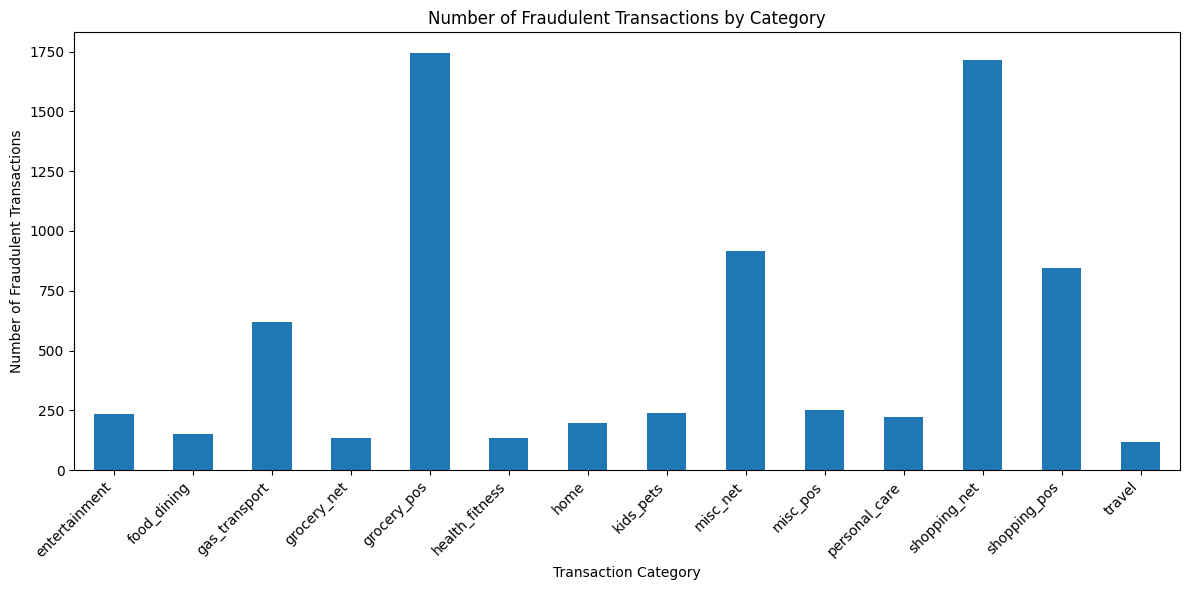

In [6]:

plt.figure(figsize=(12, 6))
fraud_count_by_category.plot(kind='bar')
plt.title('Number of Fraudulent Transactions by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [8]:
train_data.isnull().sum()

,0
category,0
amt,0
gender,0
city,0
state,0
zip,0
lat,0
long,0
city_pop,0
job,0


In [9]:
test_data.isnull().sum()

,0
category,0
amt,0
gender,0
city,0
state,0
zip,0
lat,0
long,0
city_pop,0
job,0


In [10]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])


In [11]:
train_data.head(3)

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0


In [12]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])


In [13]:
test_data.head(3)

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0


<Axes: >

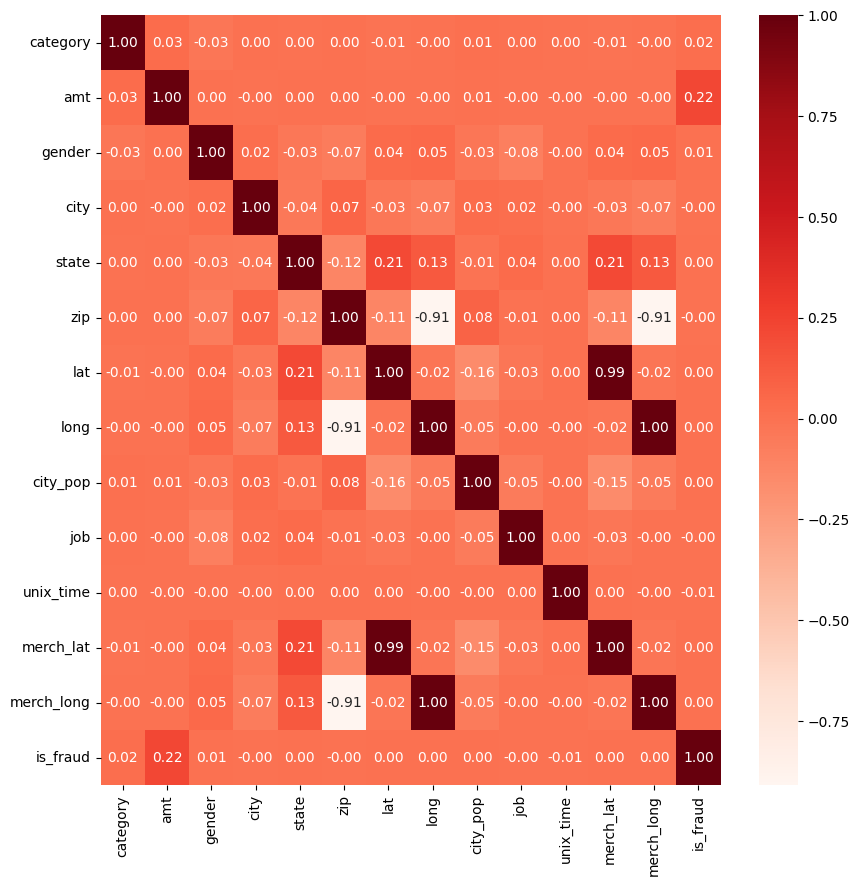

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), cmap = "Reds", annot = True, fmt = ".2f")

<Axes: xlabel='gender', ylabel='count'>

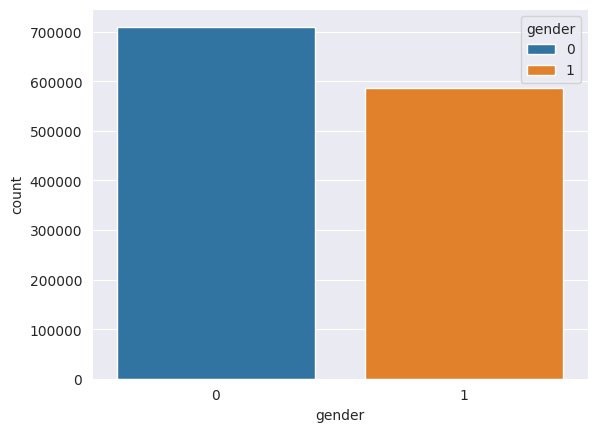

In [15]:
sns.set_style("darkgrid")
sns.countplot(data = train_data, x = "gender", hue = "gender")

In [16]:
y_train = train_data["is_fraud"]
x_train = train_data.drop(["is_fraud"], axis = 1)
y_test = test_data["is_fraud"]
x_test = test_data.drop(["is_fraud"], axis = 1)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296675, 13), (555719, 13), (1296675,), (555719,))

**USING DECISION-TREE**

In [18]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_test, y_test)

(0.9968920508222955, 0.997495136930715)

0.66164316966456


<Axes: >

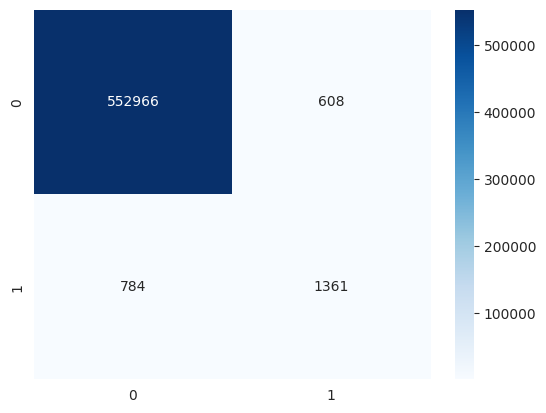

In [19]:
cf = confusion_matrix(y_test, dtc.predict(x_test))
print(f1_score(y_test, dtc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [20]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train), gnb.score(x_test, y_test)

(0.990373840785085, 0.9922568780264847)

0.0


<Axes: >

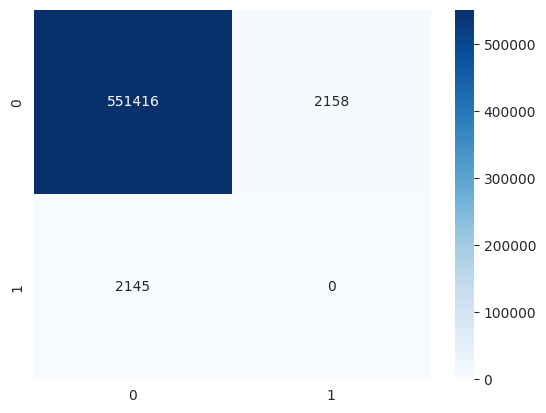

In [21]:
cf = confusion_matrix(y_test, gnb.predict(x_test))
print(f1_score(y_test, gnb.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [22]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.9998758362735458, 0.9970884565760754)

0.5051987767584097


<Axes: >

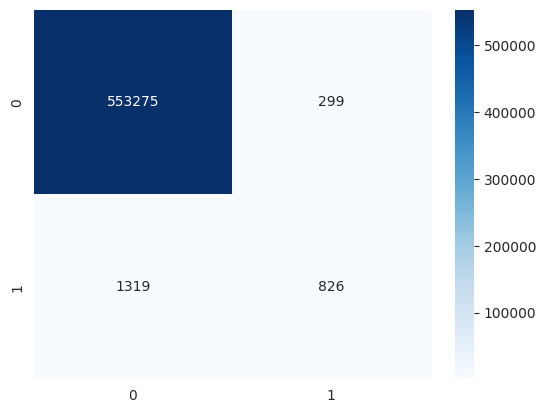

In [23]:
cf = confusion_matrix(y_test, rfc.predict(x_test))
print(f1_score(y_test, rfc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

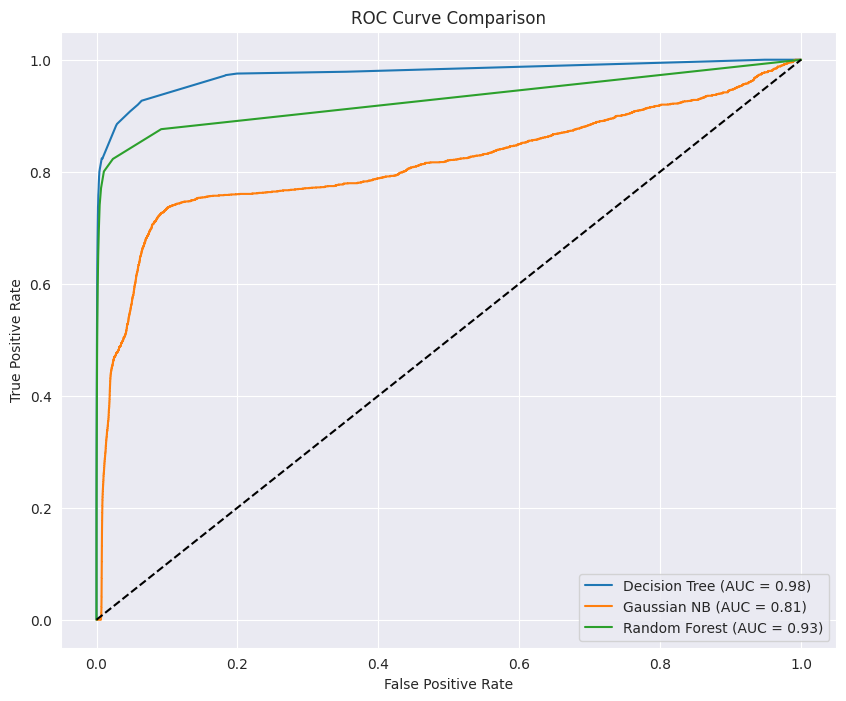

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba_dtc = dtc.predict_proba(x_test)[:, 1]
y_pred_proba_gnb = gnb.predict_proba(x_test)[:, 1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:, 1]

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_proba_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)


plt.figure(figsize=(10, 8))
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = %0.2f)' % roc_auc_rfc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [27]:
import pickle

filename = 'model.pkl'
pickle.dump(rfc, open(filename, 'wb'))

